In [12]:
import import_ipynb
import CFAR_v2 as cfar
import BilateralFilter as bf
import GeoProcess as gp
import numpy as np
import matplotlib.pyplot as plt

10201 10596


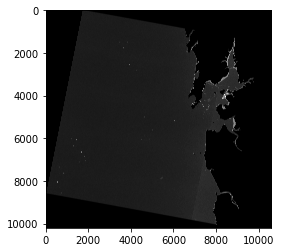

In [13]:
#Computing rows and columns
band_data_arr = gp.readGeoTiff('Dataset_963A/LandMasked_Amplitude_VH.tif')
#subset_img = gp.readGeoTiff('Dataset_963A/CFARResults/meanfiltered_img.tif')
rows,col = band_data_arr.shape
print(rows,col)
gp.visualizeImg(band_data_arr)

(357, 400)
Image Saved Succesfully.


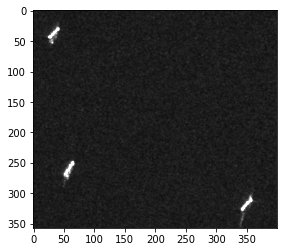

In [14]:
#subset_img = (gp.subsetImg(band_data_arr,2000,4500)) #single ship
#subset_img = gp.subsetImg(band_data_arr,4950,5700) #multiple ship.

subset_img = band_data_arr[2518:2875,3882:4282]
# #subset_img = (ir.adjustImg(np.array(subset_img)))
print(subset_img.shape)
gp.visualizeImg(subset_img)
gp.save_img2Geotiff(subset_img,'Dataset_963A/BilateralCFARResults/Input.tif')

In [15]:
bfilter = bf.BilateralFilter(subset_img,5,1,12)
filtered_image = bfilter.bilateral_filter()

Bilateral Kernel Ready.


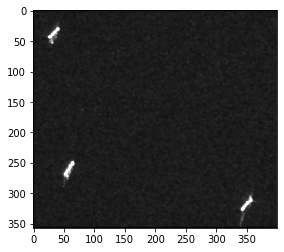

In [16]:
gp.visualizeImg(filtered_image)

In [17]:
bilateralCfar = cfar.CFAR_v2(filtered_image,80,81,100,0.1)
standardcfar = cfar.CFAR_v2(subset_img,80,81,100,0.1)

Kernel Ready.
Kernel Ready.


In [18]:
b_fimg,b_dvimg,b_timg = bilateralCfar.shipDetection()
s_fimg,s_dvimg,s_timg = standardcfar.shipDetection()

Computing DVi and Threshold..



Process completed, DV image and Threshold Image succesfully Computed.

Binary Image of Ships is Succesfully Generated.

Computing DVi and Threshold..



Process completed, DV image and Threshold Image succesfully Computed.

Binary Image of Ships is Succesfully Generated.



Image Saved Succesfully.
Image Saved Succesfully.


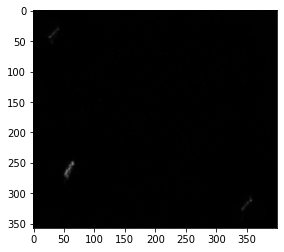

In [19]:
gp.visualizeImg(b_dvimg)
gp.save_img2Geotiff(b_dvimg,'Dataset_963A/BilateralCFARResults/Bilateral_dvimg.tif')
gp.save_img2Geotiff(s_dvimg,'Dataset_963A/BilateralCFARResults/Standard_dvimg.tif')

In [20]:
gp.save_img2Geotiff(b_fimg,'Dataset_963A/BilateralCFARResults/Bilateral_finalImg.tif')
gp.save_img2Geotiff(s_fimg,'Dataset_963A/BilateralCFARResults/Standard_finalImg.tif')

Image Saved Succesfully.
Image Saved Succesfully.


In [21]:
gp.save_img2Geotiff(b_timg,'Dataset_963A/BilateralCFARResults/Bilateral_ThresholdImg.tif')
gp.save_img2Geotiff(s_timg,'Dataset_963A/BilateralCFARResults/Standard_ThresholdImg.tif')

Image Saved Succesfully.
Image Saved Succesfully.
